In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [3]:
df['custcat'].value_counts() 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

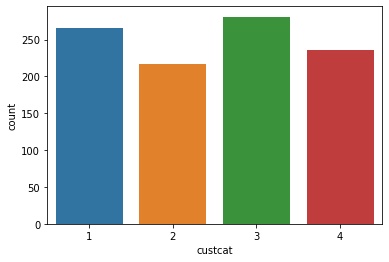

In [16]:
sns.countplot(df['custcat'])

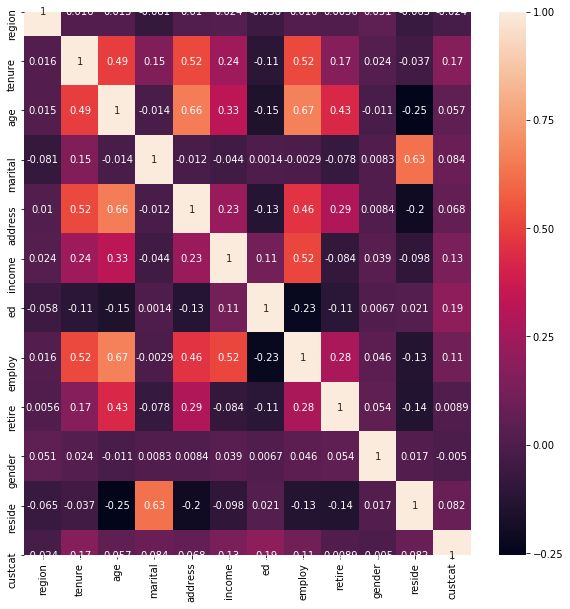

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True)

In [4]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBB91029E8>]],
      dtype=object)

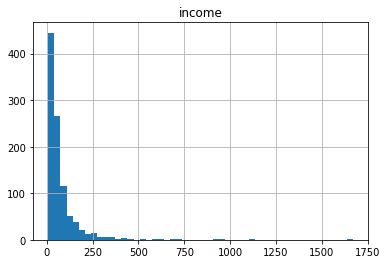

In [4]:
df.hist('income', bins = 50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array

In [20]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside', 'custcat']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [21]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalize Data

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

### Train test split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=4)

In [24]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


### K nearest neighbor (KNN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
k=4
neigh = KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

### Accuracy evaluation

In multilabel classification, accuracy classification score is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


In [35]:
neigh.predict(X_train)

array([4, 3, 3, 1, 2, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 3, 1, 1, 3, 1, 4, 3,
       4, 2, 1, 1, 1, 1, 3, 3, 2, 3, 2, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 3, 2, 1, 3, 4, 3, 1, 4, 4, 3, 4, 1, 4, 1, 2, 1, 3, 3, 3, 3, 3,
       1, 1, 2, 4, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 4, 3, 1, 1, 2, 1, 3,
       3, 4, 3, 4, 4, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 4, 2, 1,
       3, 1, 4, 2, 3, 3, 2, 3, 2, 1, 4, 4, 3, 3, 3, 1, 2, 1, 2, 3, 3, 1,
       1, 1, 1, 3, 3, 4, 2, 2, 4, 4, 2, 3, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3,
       3, 3, 3, 3, 4, 1, 2, 3, 1, 1, 1, 4, 1, 4, 1, 1, 3, 2, 1, 3, 3, 3,
       3, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 3, 3, 1, 4, 3, 3, 1, 1, 1, 2, 3,
       1, 1, 4, 2, 1, 1, 3, 4, 4, 3, 3, 1, 4, 2, 2, 3, 2, 4, 2, 1, 3, 2,
       4, 3, 3, 2, 4, 1, 4, 4, 4, 3, 3, 3, 1, 1, 3, 3, 4, 1, 1, 3, 1, 4,
       3, 3, 4, 4, 4, 1, 4, 3, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 3, 2, 2,
       4, 1, 3, 3, 3, 2, 2, 3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 3, 4, 1, 3, 1,
       1, 3, 2, 2, 3, 3, 4, 2, 4, 3, 3, 4, 4, 3, 3,

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.

In [41]:
ks =10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
ConfusionMx = [];
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

In [37]:
mean_acc

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
np.zeros(3)

array([0., 0., 0.])

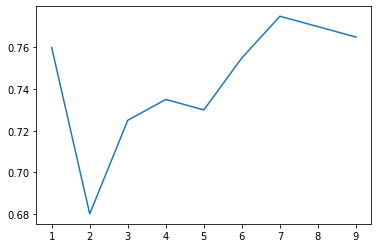

In [47]:
plt.plot(range(1,ks),mean_acc,)

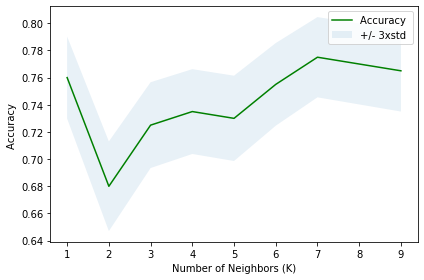

In [46]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.775 with k= 7
